In [39]:
import scipy
import matplotlib as mpl
import pandas as pd
import numpy as np

## Crimes over the years

In [3]:
# get total crimes of 2006-2015
df = pd.read_csv('./Quarter/nyc.csv')
df

,geoId,gridID,day_name,month_name,date,year,hour,lat,lon,tempf,vis,num_establishments,num_liquor_stores,num_restaurants,num_stores,num_bars,expected
0,36047028100,29233,Sunday,Jan,1/1/06 0:01,2006,1,40.693350,-73.938089,32.00,10.0,11,0,0,2,0,1
1,36005042500,36209,Sunday,Jan,1/1/06 0:10,2006,1,40.869713,-73.879388,32.00,10.0,14,0,1,4,0,1
2,36005039500,33933,Sunday,Jan,1/1/06 0:55,2006,1,40.849663,-73.898324,32.00,10.0,22,0,0,11,0,1
3,36047042900,31288,Sunday,Jan,1/1/06 2:25,2006,1,40.701964,-73.921047,32.00,9.0,29,0,0,8,0,1
4,36081028300,35607,Sunday,Jan,1/1/06 2:30,2006,1,40.747886,-73.885068,32.00,9.0,198,0,17,48,5,1
5,36047117400,36337,Sunday,Jan,1/1/06 2:30,2006,1,40.686171,-73.879388,32.00,9.0,7,0,0,1,0,1
6,36061027900,30035,Sunday,Jan,1/1/06 2:30,2006,1,40.856824,-73.930515,32.00,9.0,15,0,0,4,0,1
7,36061004100,22344,Sunday,Jan,1/1/06 3:00,2006,1,40.720623,-73.994898,32.00,9.0,199,1,28,66,10,1
8,36047029900,30617,Sunday,Jan,1/1/06 3:00,2006,1,40.678991,-73.926728,32.00,9.0,41,0,0,8,0,1
9,36005022300,31878,Sunday,Jan,1/1/06 3:00,2006,1,40.841068,-73.915366,32.00,9.0,29,0,1,7,2,1


In [4]:
df['expected'].sum()

192079

In [5]:
# get years for each

crime_dict = {}

# iterate between 2006-2015
for i in range(2006, 2016):
    year_df = df.drop(df[df.year != i].index)
    crime_dict[i] = year_df['expected'].sum()
# get total crimes for each year

print crime_dict

aggregated = []
for key, value in crime_dict.iteritems():
    info = {}
    info['year'] = key
    info['total_crime'] = value
    aggregated.append(info)
    
aggregated


{2006: 23208, 2007: 21326, 2008: 21957, 2009: 18148, 2010: 19063, 2011: 19101, 2012: 19262, 2013: 18699, 2014: 15497, 2015: 15818}


[{'total_crime': 23208, 'year': 2006},
 {'total_crime': 21326, 'year': 2007},
 {'total_crime': 21957, 'year': 2008},
 {'total_crime': 18148, 'year': 2009},
 {'total_crime': 19063, 'year': 2010},
 {'total_crime': 19101, 'year': 2011},
 {'total_crime': 19262, 'year': 2012},
 {'total_crime': 18699, 'year': 2013},
 {'total_crime': 15497, 'year': 2014},
 {'total_crime': 15818, 'year': 2015}]

In [6]:
# graph in ggplot
crime_by_year = pd.DataFrame(aggregated)
crime_by_year

,total_crime,year
0,23208,2006
1,21326,2007
2,21957,2008
3,18148,2009
4,19063,2010
5,19101,2011
6,19262,2012
7,18699,2013
8,15497,2014
9,15818,2015


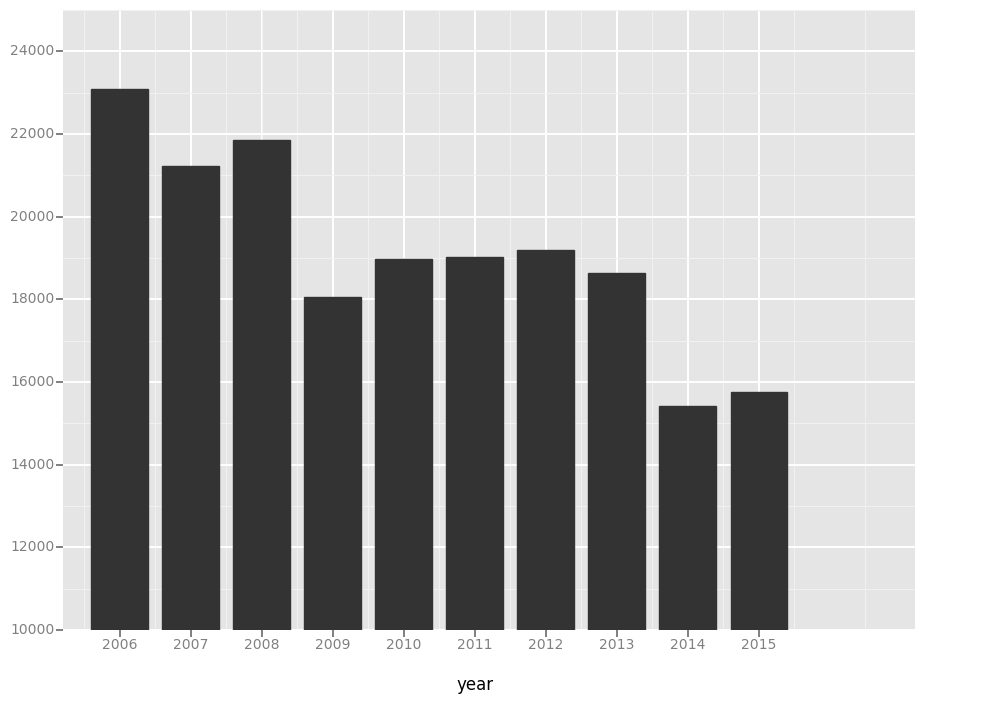

<ggplot: (273399393)>


In [7]:
from ggplot import *
# print ggplot(crime_by_year, aes('year','total_crime')) + \
#     geom_bar(stat='identity') + \
#     ylim(10000,50000)

print ggplot(df, aes('year')) + \
    geom_bar() + \
    ylim(10000, 25000)

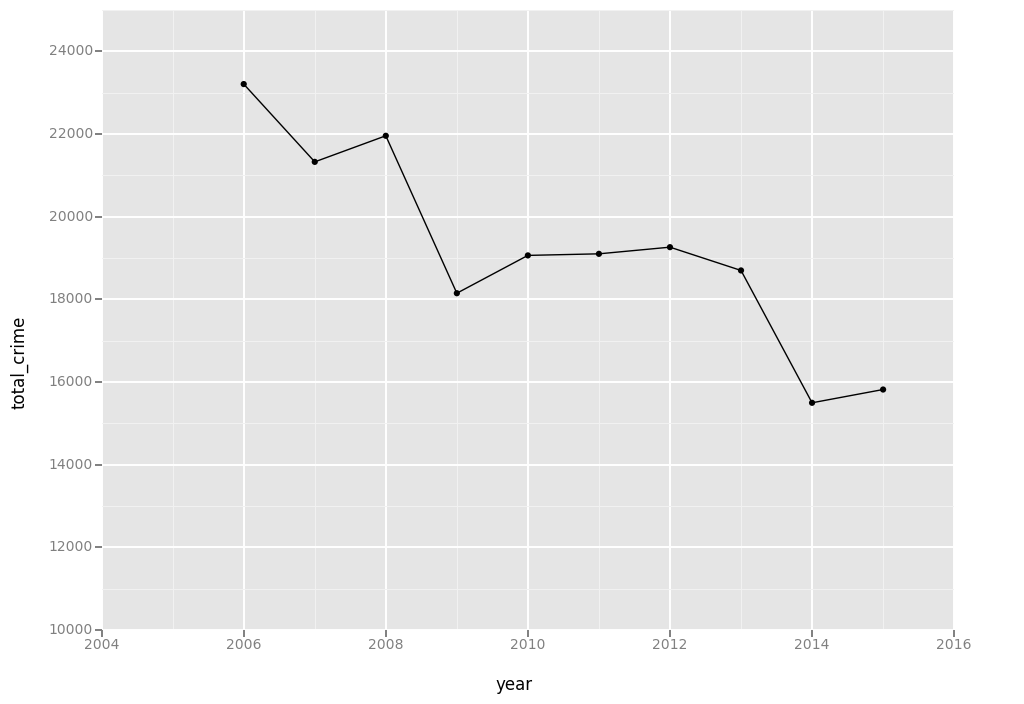

<ggplot: (279521165)>


In [8]:
print ggplot(crime_by_year, aes('year', 'total_crime')) + \
    geom_point() + \
    geom_line() + \
    ylim(10000, 25000)

## Crimes on days of the week

In [9]:
#rename days of week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df1 = df
for i, val in enumerate(order):
    print val, i
    df1['day_name'] = df1['day_name'].replace([val], i)
    
df1


Monday 0
Tuesday 1
Wednesday 2
Thursday 3
Friday 4
Saturday 5
Sunday 6


,geoId,gridID,day_name,month_name,date,year,hour,lat,lon,tempf,vis,num_establishments,num_liquor_stores,num_restaurants,num_stores,num_bars,expected
0,36047028100,29233,6,Jan,1/1/06 0:01,2006,1,40.693350,-73.938089,32.00,10.0,11,0,0,2,0,1
1,36005042500,36209,6,Jan,1/1/06 0:10,2006,1,40.869713,-73.879388,32.00,10.0,14,0,1,4,0,1
2,36005039500,33933,6,Jan,1/1/06 0:55,2006,1,40.849663,-73.898324,32.00,10.0,22,0,0,11,0,1
3,36047042900,31288,6,Jan,1/1/06 2:25,2006,1,40.701964,-73.921047,32.00,9.0,29,0,0,8,0,1
4,36081028300,35607,6,Jan,1/1/06 2:30,2006,1,40.747886,-73.885068,32.00,9.0,198,0,17,48,5,1
5,36047117400,36337,6,Jan,1/1/06 2:30,2006,1,40.686171,-73.879388,32.00,9.0,7,0,0,1,0,1
6,36061027900,30035,6,Jan,1/1/06 2:30,2006,1,40.856824,-73.930515,32.00,9.0,15,0,0,4,0,1
7,36061004100,22344,6,Jan,1/1/06 3:00,2006,1,40.720623,-73.994898,32.00,9.0,199,1,28,66,10,1
8,36047029900,30617,6,Jan,1/1/06 3:00,2006,1,40.678991,-73.926728,32.00,9.0,41,0,0,8,0,1
9,36005022300,31878,6,Jan,1/1/06 3:00,2006,1,40.841068,-73.915366,32.00,9.0,29,0,1,7,2,1


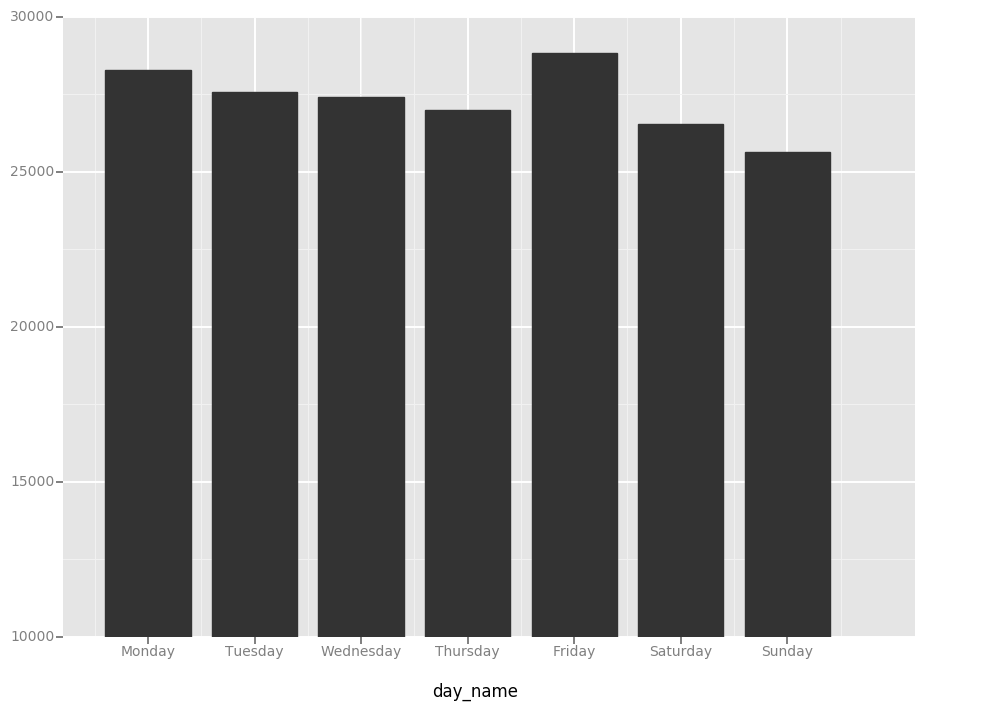

<ggplot: (280063313)>


In [10]:
print ggplot(df, aes('day_name')) + \
    geom_bar() + \
    ylim(10000, 30000) + \
    scale_x_discrete(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'])

## Weekend vs Weekday

In [41]:
#create new column: if day_name is 5 or 6

df['weekday'] = np.where(df['day_name']<5, '1', '0')


,geoId,gridID,day_name,month_name,date,year,hour,lat,lon,tempf,vis,num_establishments,num_liquor_stores,num_restaurants,num_stores,num_bars,expected,weekday
0,36047028100,29233,6,0,1/1/06 0:01,2006,1,40.693350,-73.938089,32.00,10.0,11,0,0,2,0,1,0
1,36005042500,36209,6,0,1/1/06 0:10,2006,1,40.869713,-73.879388,32.00,10.0,14,0,1,4,0,1,0
2,36005039500,33933,6,0,1/1/06 0:55,2006,1,40.849663,-73.898324,32.00,10.0,22,0,0,11,0,1,0
3,36047042900,31288,6,0,1/1/06 2:25,2006,1,40.701964,-73.921047,32.00,9.0,29,0,0,8,0,1,0
4,36081028300,35607,6,0,1/1/06 2:30,2006,1,40.747886,-73.885068,32.00,9.0,198,0,17,48,5,1,0
5,36047117400,36337,6,0,1/1/06 2:30,2006,1,40.686171,-73.879388,32.00,9.0,7,0,0,1,0,1,0
6,36061027900,30035,6,0,1/1/06 2:30,2006,1,40.856824,-73.930515,32.00,9.0,15,0,0,4,0,1,0
7,36061004100,22344,6,0,1/1/06 3:00,2006,1,40.720623,-73.994898,32.00,9.0,199,1,28,66,10,1,0
8,36047029900,30617,6,0,1/1/06 3:00,2006,1,40.678991,-73.926728,32.00,9.0,41,0,0,8,0,1,0
9,36005022300,31878,6,0,1/1/06 3:00,2006,1,40.841068,-73.915366,32.00,9.0,29,0,1,7,2,1,0


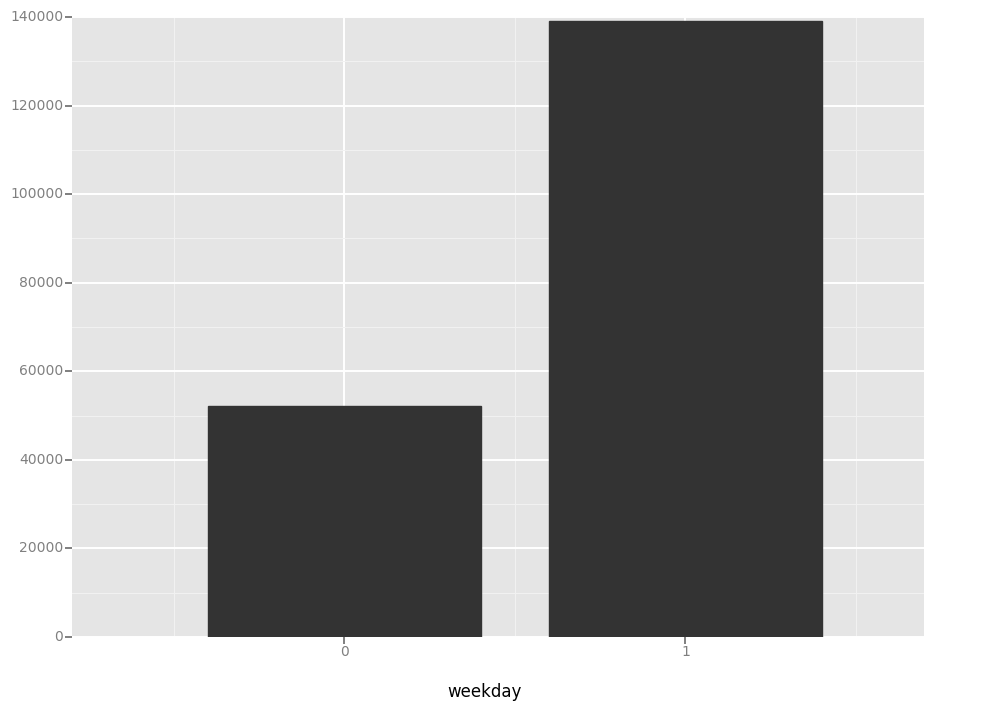

<ggplot: (279231329)>


In [45]:
print ggplot(df, aes('weekday')) + \
    geom_bar()

## By Month

In [11]:
#rename month
df['month_name'].unique()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df2 = df
for i, val in enumerate(months):
    df2['month_name'] = df1['month_name'].replace([val], i)
    
df2

Jan 0
Feb 1
Mar 2
Apr 3
May 4
Jun 5
Jul 6
Aug 7
Sep 8
Oct 9
Nov 10
Dec 11


,geoId,gridID,day_name,month_name,date,year,hour,lat,lon,tempf,vis,num_establishments,num_liquor_stores,num_restaurants,num_stores,num_bars,expected
0,36047028100,29233,6,0,1/1/06 0:01,2006,1,40.693350,-73.938089,32.00,10.0,11,0,0,2,0,1
1,36005042500,36209,6,0,1/1/06 0:10,2006,1,40.869713,-73.879388,32.00,10.0,14,0,1,4,0,1
2,36005039500,33933,6,0,1/1/06 0:55,2006,1,40.849663,-73.898324,32.00,10.0,22,0,0,11,0,1
3,36047042900,31288,6,0,1/1/06 2:25,2006,1,40.701964,-73.921047,32.00,9.0,29,0,0,8,0,1
4,36081028300,35607,6,0,1/1/06 2:30,2006,1,40.747886,-73.885068,32.00,9.0,198,0,17,48,5,1
5,36047117400,36337,6,0,1/1/06 2:30,2006,1,40.686171,-73.879388,32.00,9.0,7,0,0,1,0,1
6,36061027900,30035,6,0,1/1/06 2:30,2006,1,40.856824,-73.930515,32.00,9.0,15,0,0,4,0,1
7,36061004100,22344,6,0,1/1/06 3:00,2006,1,40.720623,-73.994898,32.00,9.0,199,1,28,66,10,1
8,36047029900,30617,6,0,1/1/06 3:00,2006,1,40.678991,-73.926728,32.00,9.0,41,0,0,8,0,1
9,36005022300,31878,6,0,1/1/06 3:00,2006,1,40.841068,-73.915366,32.00,9.0,29,0,1,7,2,1


In [17]:
list(df2.columns.values)

['geoId',
 'gridID',
 'day_name',
 'month_name',
 'date',
 'year',
 'hour',
 'lat',
 'lon',
 'tempf',
 'vis',
 'num_establishments',
 'num_liquor_stores',
 'num_restaurants',
 'num_stores',
 'num_bars',
 'expected']

In [21]:
# scale by dividing 

days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

months = []

for i, v in enumerate(days):
    month_df = df2.drop(df2[df2.month_name != i].index)
    months.append({
            'month': i, 
            'crimes_per_day': month_df['expected'].sum() / v,
            'crimes_total': month_df['expected'].sum()
        })

print months

[{'crimes_per_day': 514, 'crimes_total': 15944, 'month': 0}, {'crimes_per_day': 439, 'crimes_total': 12294, 'month': 1}, {'crimes_per_day': 455, 'crimes_total': 14109, 'month': 2}, {'crimes_per_day': 457, 'crimes_total': 13711, 'month': 3}, {'crimes_per_day': 514, 'crimes_total': 15956, 'month': 4}, {'crimes_per_day': 525, 'crimes_total': 15770, 'month': 5}, {'crimes_per_day': 546, 'crimes_total': 16941, 'month': 6}, {'crimes_per_day': 562, 'crimes_total': 17450, 'month': 7}, {'crimes_per_day': 580, 'crimes_total': 17426, 'month': 8}, {'crimes_per_day': 604, 'crimes_total': 18725, 'month': 9}, {'crimes_per_day': 562, 'crimes_total': 16866, 'month': 10}, {'crimes_per_day': 544, 'crimes_total': 16887, 'month': 11}]


In [23]:
avg_crime_month = pd.DataFrame(months)
avg_crime_month

,crimes_per_day,crimes_total,month
0,514,15944,0
1,439,12294,1
2,455,14109,2
3,457,13711,3
4,514,15956,4
5,525,15770,5
6,546,16941,6
7,562,17450,7
8,580,17426,8
9,604,18725,9


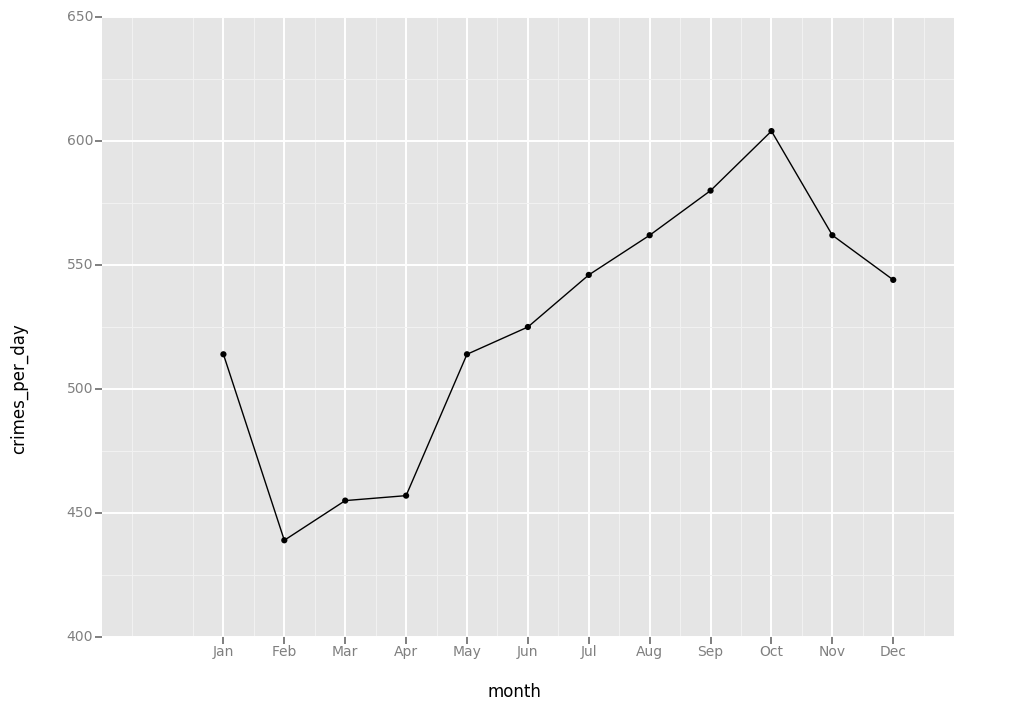

<ggplot: (275316625)>

In [47]:
p = ggplot(avg_crime_month, aes(x='month', y='crimes_per_day')) + \
    geom_point() + geom_line() + \
    scale_x_discrete(breaks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
p

In [48]:
p.save('crime_by_month.jpg')

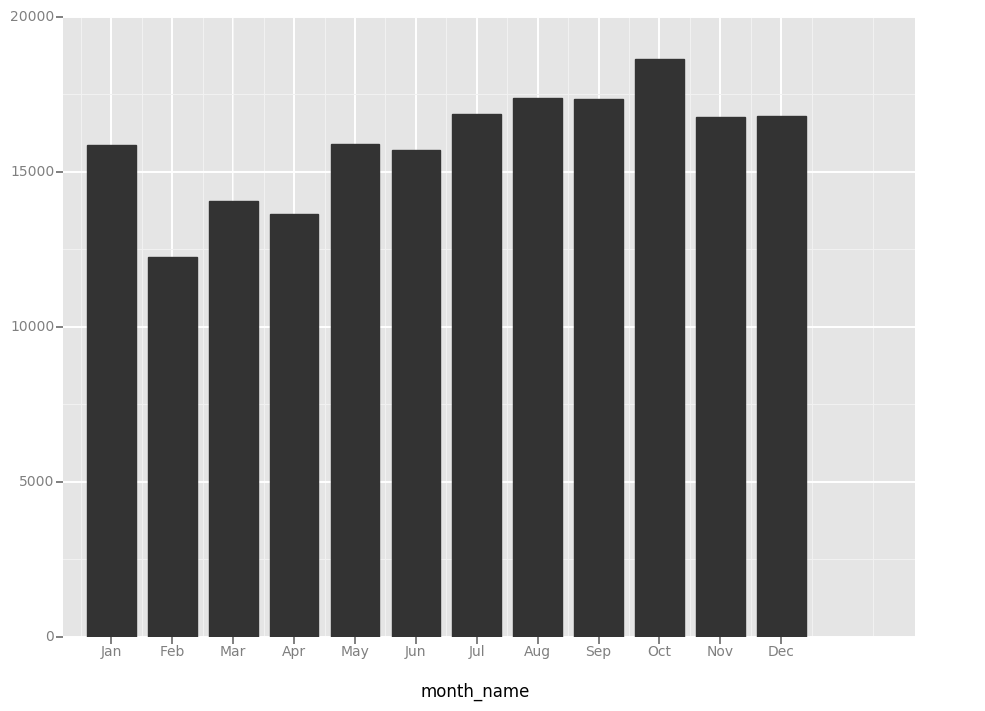

<ggplot: (280293365)>


In [13]:
# print ggplot(df2, aes('month_name')) + \
#     geom_bar() + \
#     scale_x_discrete(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    

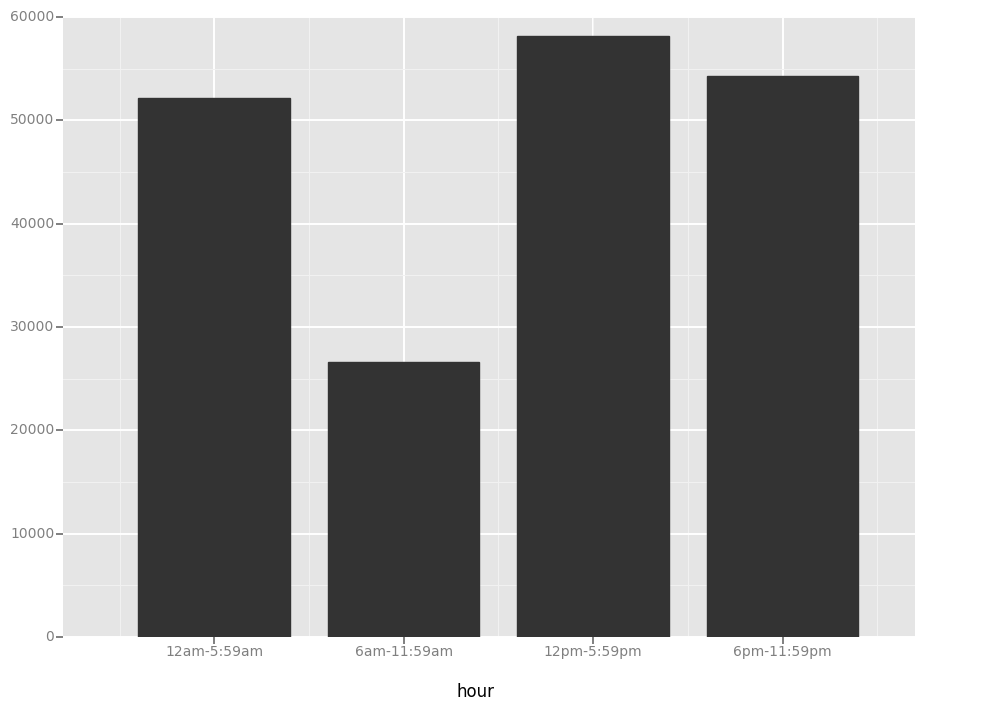

<ggplot: (279958525)>


In [37]:
print ggplot(df, aes('hour')) + \
    geom_bar() + \
    scale_x_discrete(labels=['12am-5:59am', '6am-11:59am', '12pm-5:59pm', '6pm-11:59pm'])